# Simulated Annealing para resolver el Traveling Salesman Problem
## Métodos Numéricos y Optimización


El algoritmo se Simulated Annealing da una solución a la búsqueda de óptimos globales. Pertenece a los métodos Gradient Free ya que no requiere conocer la derivada del problema a optimizar. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
inicio=[81, 387]
x2=[347, 59]
x3=[81, 318]
x4=[425, 40]
x5=[456, 300]
x6=[194, 11]
x7=[162, 89]
x8=[250, 200]

ciudades=[inicio,x2,x3,x4,x5,x6,x7,x8,inicio]

In [3]:
@jit
def graficaRuta(ruta):
    xs = [x[0] for x in ruta]
    ys = [x[1] for x in ruta]
    plt.plot(xs, ys)
    plt.scatter(xs, ys)
    plt.show()
    print(ruta)

In [4]:

def configInicial(ciudades):
    if inicio in ciudades:
        ciudades.remove(inicio)
    np.random.shuffle(ciudades)
    ciudades = [inicio] + ciudades +[inicio]
    return ciudades 
    

In [5]:
@jit
def distanciaTotal(ruta):   #Función que calcula la distancia total del recorrido completo.
    costo_ruta = getDistance(ruta[0], ruta[len(ruta)-1]); #costo del regreso a punto de salida
    for  i in range( 1, (len(ruta)-1) ) :
        costo_ruta += getDistance(ruta[i-1], ruta[i]); #costo entre puntos
    return (costo_ruta)
    

In [6]:
@jit
def getDistance(ciudad1, ciudad2):  #Calcula la distancia entre 2 puntos
    distance = np.sqrt(((ciudad1[0]-ciudad2[0])**2)+((ciudad1[1]-ciudad2[1])**2))
    return(distance)

In [10]:
@jit
def swapCities(ruta): #Intercambia 2 ciudades elegidas aleatoriamente 
    nueva_ruta=ruta
    indices_intercambio=np.random.choice(range(1,len(ruta)-1),2, replace=False); #punto de salida no cambia
    indice1=indices_intercambio[0];
    indice2=indices_intercambio[1];
    nueva_ruta[indice1], nueva_ruta[indice2] = ruta[indice2], ruta[indice1] ;
    return(nueva_ruta)

In [26]:

def simulatedAnnealing(ciudades, num_iteraciones, T, deltaT, grado ):
    ruta = configInicial(ciudades);
    costo_ruta = distanciaTotal(ruta);
    mejor_ruta = ruta;     
    costo_mejor_ruta = costo_ruta;
    costos_mejores=[costo_ruta]
    paro=0
    ciclos= 0
    costosi=[]
    
    #for i in range(0, num_iteraciones):
    while paro<grado:
        ciclos=ciclos+1
        nueva_ruta = swapCities(ruta);
        costo_nueva_ruta = distanciaTotal(nueva_ruta);  #Nueva ruta= candidato
                
        #costos.append(costo_nueva_ruta);   #### Variable para graficar el progreso 
        
        if (costo_nueva_ruta < costo_ruta): #comparamos con el punto pasado. Primer caso donde si mejora (Explotación)
            ruta = nueva_ruta;
            costo_ruta = costo_nueva_ruta;
            paro = paro+1
            costosi.append(costo_nueva_ruta)
            
            if (costo_ruta < costo_mejor_ruta): #comparamos con la mejor ruta hasta el momento.
                mejor_ruta = ruta;
                costo_mejor_ruta = costo_ruta;
                costos_mejores.append(costo_mejor_ruta)
                paro=0
                #graficaRuta(mejor_ruta)
        else:
            w = np.exp((costo_ruta - costo_nueva_ruta)/T);  #Caso donde no mejora (Exploración)
            if (np.random.random()<w):  
                ruta = nueva_ruta;
                costo_ruta = costo_nueva_ruta;
                paro = paro+1
                costosi.append(costo_nueva_ruta)

        T = T*deltaT;   #Bajamos la temperatura en cada iteración  
    
    return(mejor_ruta, costo_mejor_ruta, costos_mejores, ciclos, costosi)
    

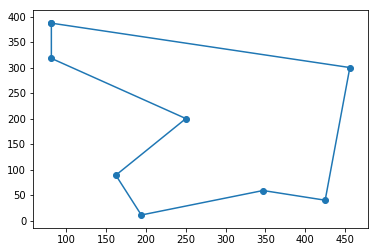

[[81, 387], [81, 318], [250, 200], [162, 89], [194, 11], [347, 59], [425, 40], [456, 300], [81, 387]]


In [24]:
np.random.seed(20)
a=3
mejor_ruta, costo_mejor_ruta, costos_mejores, ciclos, costosi = simulatedAnnealing(ciudades, 1000,100,.9,a)
graficaRuta(mejor_ruta)

#print(ciclos)
#print(len(costos))
#iteraciones=[i for i in range (0,len(costosi))]
#plt.plot(iteraciones,costosi)
#len(costosi)

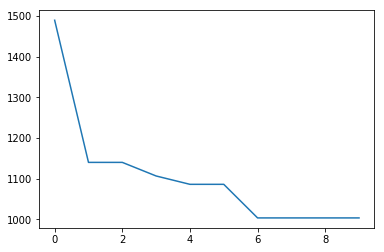

In [25]:
iteraciones=[i for i in range (0,len(costosi))]
plt.plot(iteraciones,costosi)